In [3]:
#1 zad

import numpy as np

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
train_data=generate_data(200)

np.random.seed(12)
test_data=generate_data(100)

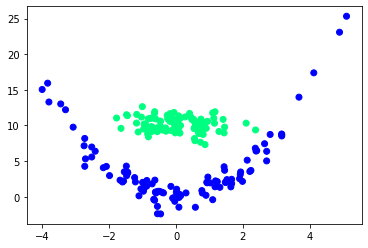

In [5]:
#2 zad

import matplotlib.pyplot as plt

plt.scatter(train_data[:,0], train_data[:,1], c=train_data[:,2], cmap='winter')
plt.show()

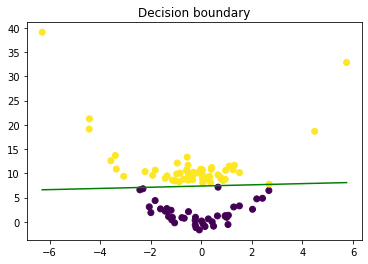

In [9]:
#3 zad

from sklearn.linear_model import LogisticRegression

def probabilityToClass(h):
    return 1*(h >= 0.5)

logreg = LogisticRegression().fit(train_data[:,0:2],train_data[:,2])

xp = np.array([test_data[:,0].min(), test_data[:,0].max()])
yp1 = -logreg.coef_[0][0]/logreg.coef_[0][1] * xp[0] - logreg.intercept_[0]/logreg.coef_[0][1]
yp2 = -logreg.coef_[0][0]/logreg.coef_[0][1] * xp[1] - logreg.intercept_[0]/logreg.coef_[0][1]
yp = np.array([yp1,yp2])

plt.scatter(test_data[:,0], test_data[:,1], c=probabilityToClass(logreg.predict(test_data[:,0:2])))
plt.plot(xp,yp,'g')
plt.title("Decision boundary")
plt.show()

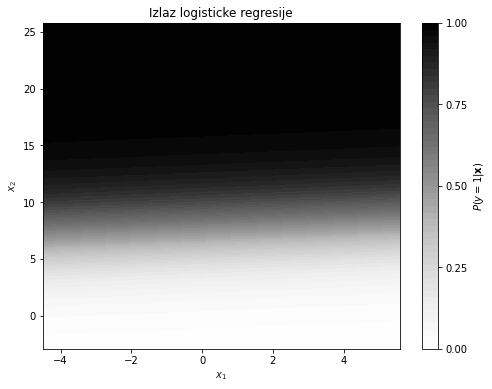

In [11]:
#4 zad

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_data[:,0])-0.5:max(train_data[:,0])+0.5:.05,
 min(train_data[:,1])-0.5:max(train_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

Text(0.5, 1.0, 'Incorrect predictions')

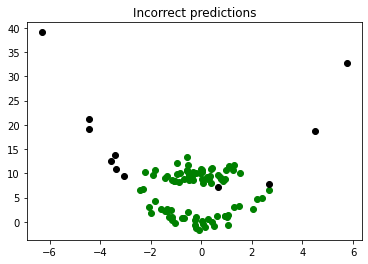

In [14]:
#5 zad

predictedClass=probabilityToClass(logreg.predict(test_data[:,0:2]))

correctPredictions=test_data[predictedClass==test_data[:,2]][:,0:2]
incorrectPredictions=test_data[predictedClass!=test_data[:,2]][:,0:2]

plt.scatter(correctPredictions[:,0], correctPredictions[:,1], c='g')
plt.scatter(incorrectPredictions[:,0], incorrectPredictions[:,1], c='black')
plt.title('Incorrect predictions')

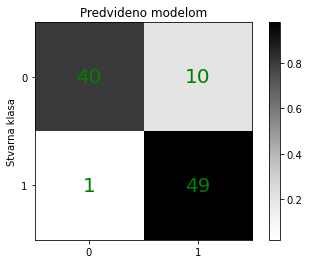

accuracy = 0.89%
precision = 0.80%
recall = 0.98%
specificity = 0.98%


In [16]:
#6 zad

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

c_matrix=confusion_matrix(test_data[:,2], predictedClass)
plot_confusion_matrix(c_matrix)

print("accuracy = " + "{:.2f}".format((c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()) + "%")
print("precision = " + "{:.2f}".format(c_matrix[0,0]/(c_matrix[0,0]+c_matrix[0,1])) + "%")
print("recall = " + "{:.2f}".format(c_matrix[0,0]/(c_matrix[0,0]+c_matrix[1,0])) + "%")
print("specificity = " + "{:.2f}".format(c_matrix[1,1]/(c_matrix[1,0]+c_matrix[1,1])) + "%")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


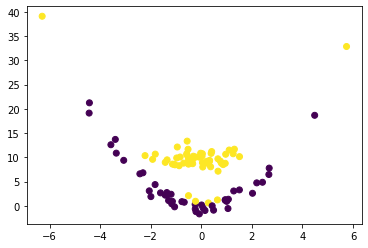

In [31]:
#7 zad

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8, include_bias = False)
train_data_new = poly.fit_transform(train_data[:,0:2])

logreg=LogisticRegression().fit(train_data_new,train_data[:,2])

plt.scatter(test_data[:,0], test_data[:,1], c=probabilityToClass(logreg.predict(poly.fit_transform(test_data[:,0:2]))))
plt.show()

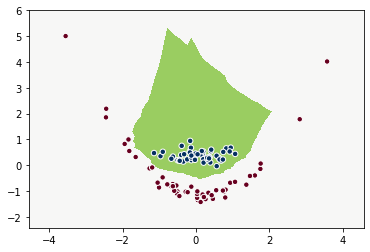

In [27]:
#8 zad

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

def plot_KNN(KNN_model, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
    np.arange(x2_min, x2_max, 0.01))
    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu', edgecolor='white', label = 'train')

kNN= KNeighborsClassifier(n_neighbors=5)
X=preprocessing.scale(train_data[:,0:2])
y=train_data[:,2]
kNN.fit(X, y)
X=preprocessing.scale(test_data[:,0:2])
y=kNN.predict(X)
plot_KNN(kNN, X, y)